In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df=pd.read_csv('ch6_cell28_dev_feat1_filtered.tsv.gz', sep='\t', header=0)

In [4]:
del df['name'] #remove the none-use column
df

,rel#count,http://dbpedia.org/ontology/area#1,http://dbpedia.org/ontology/areaCode#count,http://dbpedia.org/ontology/areaLand#count,http://dbpedia.org/ontology/areaLand#1,http://dbpedia.org/ontology/areaLand#2,http://dbpedia.org/ontology/areaTotal#count,http://dbpedia.org/ontology/areaTotal#1,http://dbpedia.org/ontology/areaWater#count,http://dbpedia.org/ontology/areaWater#1,...,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_Hamburg>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_people_from_Bolton>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_educational_institutions>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_local_government>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/Hainan>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@OTHER,http://xmlns.com/foaf/0.1/homepage#count,http://xmlns.com/foaf/0.1/name#count,http://xmlns.com/foaf/0.1/nick#count,population
0,2.856124,0.0,0.30103,0.000000,0.0,0.000000e+00,0.301030,2.452100e+10,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.477121,0.301030,0.30103,6.661582
1,3.358316,0.0,0.30103,0.301030,165760000.0,0.000000e+00,0.301030,2.193200e+08,0.301030,5.356000e+07,...,0.0,0.0,0.0,0.0,0.0,1.0,0.301030,0.301030,0.30103,5.925489
2,2.561101,0.0,0.30103,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.301030,0.301030,0.00000,5.422780
3,2.955207,0.0,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.301030,0.00000,6.119513
4,2.082785,0.0,0.00000,0.477121,62700000.0,6.270361e+07,0.477121,6.286000e+07,0.477121,1.553993e+05,...,0.0,0.0,0.0,0.0,0.0,1.0,0.301030,0.301030,0.00000,4.770594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44954,1.000000,0.0,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.477121,0.00000,3.407391
44955,1.000000,0.0,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.477121,0.00000,3.924072
44956,1.342423,0.0,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.301030,0.301030,0.00000,4.327706
44957,1.505150,0.0,0.30103,0.000000,0.0,0.000000e+00,0.301030,1.596000e+08,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.301030,0.477121,0.30103,5.943385


In [5]:
from sklearn.model_selection import train_test_split

rand=0
y = df.population
X = df.iloc[:,0:-1] #pick the first 379 columns

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.8,random_state=rand)




In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#reference: https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

rf = RandomForestRegressor(n_estimators = 100,n_jobs = -1,bootstrap = True,random_state=0)
rf.fit(X_train, y_train)


print('R^2 Training Score: {:.5f}\nR^2 Validation Score: {:.5f} \nMSE Training: {:.5f}  \nMSE Testing: {:.5f} '.format(rf.score(X_train, y_train), \
                                                                                             
                                                                                             rf.score(X_valid, y_valid),\
                                                                                                metrics.mean_squared_error(y_train, rf.predict(X_train)),
                                                                                                metrics.mean_squared_error(y_valid, rf.predict(X_valid))))

R^2 Training Score: 0.95707
R^2 Validation Score: 0.75371 
MSE Training: 0.01977  
MSE Testing: 0.11539 


In [106]:
feature_importance=list(zip(rf.feature_importances_,range(0,379))) #sort with index



In [107]:

feature_importance=sorted(feature_importance,key=lambda x:x[0],reverse=1)

In [108]:
col_names=[df.columns[i[1]] for i in feature_importance] #column names
y_axis=[i[0] for i in feature_importance]
x_axis=[i[1] for i in feature_importance]


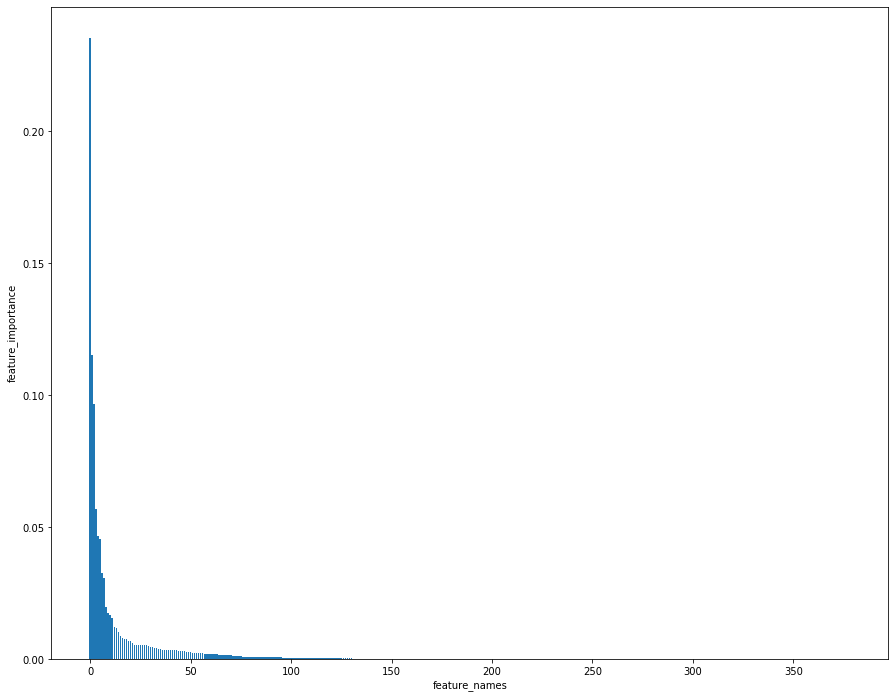

In [109]:
plt.figure(figsize=(15,12))
plt.bar(range(379),y_axis)
#plt.xticks(rotation=90)
plt.xlabel('feature_names')
plt.ylabel('feature_importance')
plt.show()

This might be not quite clear, lets only pick the top 10 features

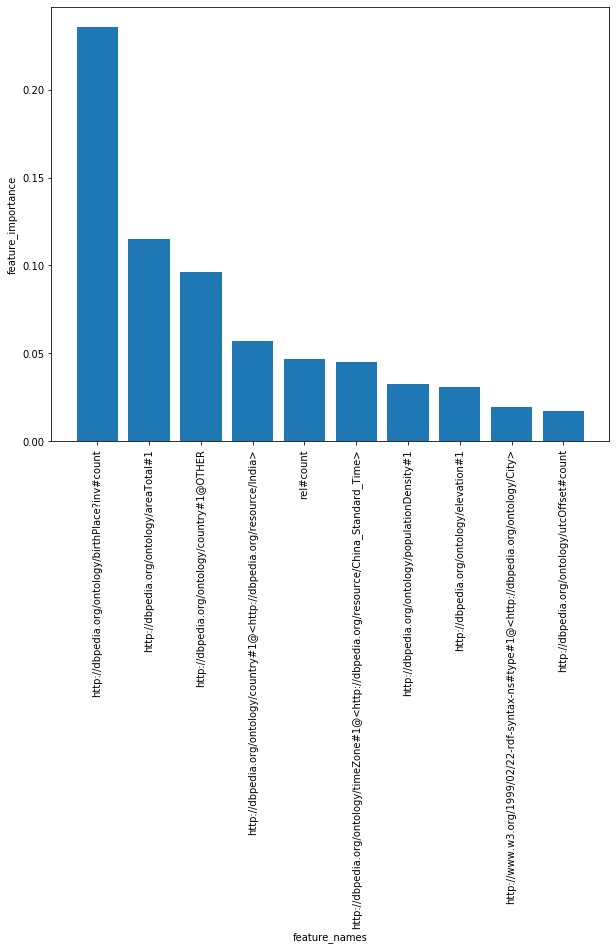

In [110]:
plt.figure(figsize=(10,8))
plt.bar(range(10),y_axis[0:10])
plt.xticks(range(10),col_names[0:10],rotation=90)
plt.xlabel('feature_names')
plt.ylabel('feature_importance')
plt.show()

In [111]:
print("Now, we have three very top features, they are:  ")
print(col_names[0])
print(col_names[1])
print(col_names[2])

Now, we have three very top features, they are:  
http://dbpedia.org/ontology/birthPlace?inv#count
http://dbpedia.org/ontology/areaTotal#1
http://dbpedia.org/ontology/country#1@OTHER


Lets pick one to make up a new binary feature:

Text(0.5, 1.0, 'http://dbpedia.org/ontology/country#1@OTHER')

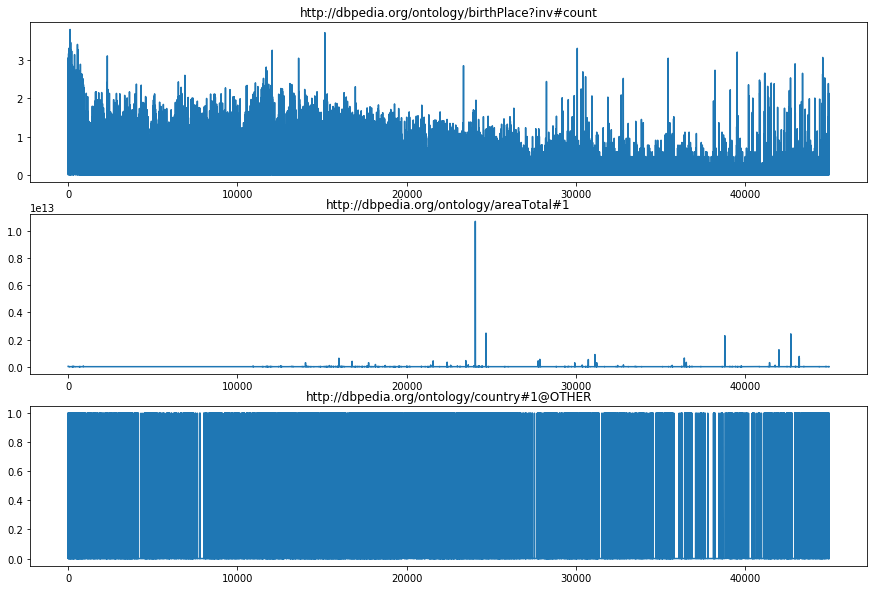

In [112]:
f = plt.figure(figsize=(15,10))
ax1 = f.add_subplot(311)
ax2 = f.add_subplot(312)
ax3 = f.add_subplot(313)

x=range(df.shape[0])
ax1.plot(x,df[col_names[0]])
ax2.plot(x,df[col_names[1]])
ax3.plot(x,df[col_names[2]])

ax1.set_title(col_names[0])
ax2.set_title(col_names[1])
ax3.set_title(col_names[2])



Clearly, we can see that the http://dbpedia.org/ontology/country#1@OTHER feature is already a binary number
and http://dbpedia.org/ontology/areaTotal#1 already has a very clear splitted point. Hence, I will use only http://dbpedia.org/ontology/birthPlace?inv#count, which is the top importance feature, to make up a new feature.

Here I will pick threshold=1 as the splitted point for that feature

In [113]:
df_2=pd.DataFrame.copy(df) #copy the df
df_2[col_names[0]]=df_2[col_names[0]].apply(lambda x:x>0).astype(int) #change the threshold here！


print(df_2[col_names[0]].nunique())

2


In [114]:
df_2.groupby(col_names[0]).count()

,rel#count,http://dbpedia.org/ontology/area#1,http://dbpedia.org/ontology/areaCode#count,http://dbpedia.org/ontology/areaLand#count,http://dbpedia.org/ontology/areaLand#1,http://dbpedia.org/ontology/areaLand#2,http://dbpedia.org/ontology/areaTotal#count,http://dbpedia.org/ontology/areaTotal#1,http://dbpedia.org/ontology/areaWater#count,http://dbpedia.org/ontology/areaWater#1,...,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_Hamburg>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_people_from_Bolton>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_educational_institutions>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_local_government>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/Hainan>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@OTHER,http://xmlns.com/foaf/0.1/homepage#count,http://xmlns.com/foaf/0.1/name#count,http://xmlns.com/foaf/0.1/nick#count,population
http://dbpedia.org/ontology/birthPlace?inv#count,,,,,,,,,,,,,,,,,,,,,
0,24363,24363,24363,24363,24363,24363,24363,24363,24363,24363,...,24363,24363,24363,24363,24363,24363,24363,24363,24363,24363
1,20596,20596,20596,20596,20596,20596,20596,20596,20596,20596,...,20596,20596,20596,20596,20596,20596,20596,20596,20596,20596


In [115]:
df_2

,rel#count,http://dbpedia.org/ontology/area#1,http://dbpedia.org/ontology/areaCode#count,http://dbpedia.org/ontology/areaLand#count,http://dbpedia.org/ontology/areaLand#1,http://dbpedia.org/ontology/areaLand#2,http://dbpedia.org/ontology/areaTotal#count,http://dbpedia.org/ontology/areaTotal#1,http://dbpedia.org/ontology/areaWater#count,http://dbpedia.org/ontology/areaWater#1,...,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_Hamburg>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_people_from_Bolton>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_educational_institutions>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_local_government>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/Hainan>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@OTHER,http://xmlns.com/foaf/0.1/homepage#count,http://xmlns.com/foaf/0.1/name#count,http://xmlns.com/foaf/0.1/nick#count,population
0,2.856124,0.0,0.30103,0.000000,0.0,0.000000e+00,0.301030,2.452100e+10,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.477121,0.301030,0.30103,6.661582
1,3.358316,0.0,0.30103,0.301030,165760000.0,0.000000e+00,0.301030,2.193200e+08,0.301030,5.356000e+07,...,0.0,0.0,0.0,0.0,0.0,1.0,0.301030,0.301030,0.30103,5.925489
2,2.561101,0.0,0.30103,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.301030,0.301030,0.00000,5.422780
3,2.955207,0.0,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.301030,0.00000,6.119513
4,2.082785,0.0,0.00000,0.477121,62700000.0,6.270361e+07,0.477121,6.286000e+07,0.477121,1.553993e+05,...,0.0,0.0,0.0,0.0,0.0,1.0,0.301030,0.301030,0.00000,4.770594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44954,1.000000,0.0,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.477121,0.00000,3.407391
44955,1.000000,0.0,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.477121,0.00000,3.924072
44956,1.342423,0.0,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.301030,0.301030,0.00000,4.327706
44957,1.505150,0.0,0.30103,0.000000,0.0,0.000000e+00,0.301030,1.596000e+08,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.301030,0.477121,0.30103,5.943385


it seems okay since we have 40929 samples marked as 0 and 4030 marked as 1 after we modify the features

First, try if we replace this feature with the modified bianry labels.

In [116]:
def score(input_df):

    y = input_df.population
    X = input_df.iloc[:,0:-1]
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.8,random_state=0)

    rf_tmp = RandomForestRegressor(n_estimators = 100,n_jobs = -1,oob_score = True,bootstrap = True)
    rf_tmp.fit(X_train, y_train)


    print('R^2 Training Score: {:.5f}\nR^2 Validation Score: {:.5f} \nMSE Training: {:.5f}  \nMSE Testing: {:.5f} '.format(rf_tmp.score(X_train, y_train), \
                                                                                             
                                                                                             rf_tmp.score(X_valid, y_valid),\
                                                                                                metrics.mean_squared_error(y_train, rf_tmp.predict(X_train)),
                                                                                                metrics.mean_squared_error(y_valid, rf_tmp.predict(X_valid))))
    
    feature_importance_tmp=list(zip(rf_tmp.feature_importances_,range(0,rf_tmp.feature_importances_.shape[0])))
    feature_importance_tmp=sorted(feature_importance_tmp,key=lambda x:x[0],reverse=1)
    
    col_names=[input_df.columns[i[1]] for i in feature_importance_tmp]
    
    for i in range(10):
        print(feature_importance_tmp[i][0],col_names[i])
    
    
    
score(df_2)


R^2 Training Score: 0.95733
R^2 Validation Score: 0.75156 
MSE Training: 0.01965  
MSE Testing: 0.11639 
0.16536816150041223 rel#count
0.1632216889488894 http://dbpedia.org/ontology/areaTotal#1
0.08425855591780415 http://dbpedia.org/ontology/country#1@OTHER
0.06070257108698421 http://dbpedia.org/ontology/birthPlace?inv#count
0.04636425897475933 http://dbpedia.org/ontology/country#1@<http://dbpedia.org/resource/India>
0.0336219667609914 http://dbpedia.org/ontology/populationDensity#1
0.030420847413931505 http://dbpedia.org/ontology/elevation#1
0.028932797228787076 http://dbpedia.org/ontology/timeZone#1@<http://dbpedia.org/resource/China_Standard_Time>
0.028814729856249305 http://www.w3.org/1999/02/22-rdf-syntax-ns#type#1@<http://dbpedia.org/ontology/City>
0.018443962125623194 http://dbpedia.org/ontology/areaLand#1


It seems we have a strong improvement(decrease) on MSE metrics

lets try what if we append the modified features to the original dataset

In [117]:


df_3=pd.concat([df.iloc[:,0:-1], pd.DataFrame(range(df.shape[0]),columns=['modified']),df.iloc[:,-1]],axis=1) #create one empty column
df_3['modified']=df_2[col_names[0]] #assgin that column with the modified features

#if you wanna create your own colunm, please always keep population column as the last column

In [118]:
score(df_3)

R^2 Training Score: 0.95763
R^2 Validation Score: 0.75428 
MSE Training: 0.01951  
MSE Testing: 0.11512 
0.2310512198660749 http://dbpedia.org/ontology/birthPlace?inv#count
0.11566094791103194 http://dbpedia.org/ontology/areaTotal#1
0.09777766430491136 http://dbpedia.org/ontology/country#1@OTHER
0.057912502450115165 http://dbpedia.org/ontology/country#1@<http://dbpedia.org/resource/India>
0.04748193504236907 rel#count
0.045714342833953016 http://dbpedia.org/ontology/timeZone#1@<http://dbpedia.org/resource/China_Standard_Time>
0.031826009478583106 http://dbpedia.org/ontology/populationDensity#1
0.03107700271693921 http://dbpedia.org/ontology/elevation#1
0.018990418621479245 http://www.w3.org/1999/02/22-rdf-syntax-ns#type#1@<http://dbpedia.org/ontology/City>
0.016630312049595728 http://dbpedia.org/ontology/utcOffset#count


This time, I have picked 2 as the threshold, the reason is that a lot of samples have 0 values and others are greater than 0. Now, this feature has been modified to weather it is 0

I do see a better improvement on test data MSE, from 0.11480  to 0.11306  if we replace it. However, if we do not replace it and just append it, the result seems just some improvement from 0.11480  to 0.11412.

Lets consider some possible explainations:



In [119]:
df_3

,rel#count,http://dbpedia.org/ontology/area#1,http://dbpedia.org/ontology/areaCode#count,http://dbpedia.org/ontology/areaLand#count,http://dbpedia.org/ontology/areaLand#1,http://dbpedia.org/ontology/areaLand#2,http://dbpedia.org/ontology/areaTotal#count,http://dbpedia.org/ontology/areaTotal#1,http://dbpedia.org/ontology/areaWater#count,http://dbpedia.org/ontology/areaWater#1,...,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_people_from_Bolton>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_educational_institutions>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_local_government>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/Hainan>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@OTHER,http://xmlns.com/foaf/0.1/homepage#count,http://xmlns.com/foaf/0.1/name#count,http://xmlns.com/foaf/0.1/nick#count,modified,population
0,2.856124,0.0,0.30103,0.000000,0.0,0.000000e+00,0.301030,2.452100e+10,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.477121,0.301030,0.30103,1,6.661582
1,3.358316,0.0,0.30103,0.301030,165760000.0,0.000000e+00,0.301030,2.193200e+08,0.301030,5.356000e+07,...,0.0,0.0,0.0,0.0,1.0,0.301030,0.301030,0.30103,1,5.925489
2,2.561101,0.0,0.30103,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.301030,0.301030,0.00000,1,5.422780
3,2.955207,0.0,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.301030,0.00000,1,6.119513
4,2.082785,0.0,0.00000,0.477121,62700000.0,6.270361e+07,0.477121,6.286000e+07,0.477121,1.553993e+05,...,0.0,0.0,0.0,0.0,1.0,0.301030,0.301030,0.00000,1,4.770594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44954,1.000000,0.0,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.477121,0.00000,0,3.407391
44955,1.000000,0.0,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.477121,0.00000,0,3.924072
44956,1.342423,0.0,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,1.0,0.301030,0.301030,0.00000,1,4.327706
44957,1.505150,0.0,0.30103,0.000000,0.0,0.000000e+00,0.301030,1.596000e+08,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,1.0,0.301030,0.477121,0.30103,1,5.943385


In [120]:
df_3.groupby('modified').count()

,rel#count,http://dbpedia.org/ontology/area#1,http://dbpedia.org/ontology/areaCode#count,http://dbpedia.org/ontology/areaLand#count,http://dbpedia.org/ontology/areaLand#1,http://dbpedia.org/ontology/areaLand#2,http://dbpedia.org/ontology/areaTotal#count,http://dbpedia.org/ontology/areaTotal#1,http://dbpedia.org/ontology/areaWater#count,http://dbpedia.org/ontology/areaWater#1,...,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_Hamburg>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_people_from_Bolton>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_educational_institutions>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_local_government>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/Hainan>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@OTHER,http://xmlns.com/foaf/0.1/homepage#count,http://xmlns.com/foaf/0.1/name#count,http://xmlns.com/foaf/0.1/nick#count,population
modified,,,,,,,,,,,,,,,,,,,,,
0,24363,24363,24363,24363,24363,24363,24363,24363,24363,24363,...,24363,24363,24363,24363,24363,24363,24363,24363,24363,24363
1,20596,20596,20596,20596,20596,20596,20596,20596,20596,20596,...,20596,20596,20596,20596,20596,20596,20596,20596,20596,20596
